# Random Forest

O random forest é um modelo de aprendizado de máquina levemente parecido com o decision tree, a diferença é que este modelo cria várias árvores de decisão, coletando seus resultados e combinando-os, para assim, poder obter uma previsão mais precisa e estável, como no exemplo abaixo.

<center>

![image.png](../figures/random_forest_ex.png)

</center>

## Importando as bibliotecas scikit-learn e o Pandas

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, accuracy_score

## Lendo o Dataset tratado, transformando-o em um DataFrame e armazenando nas variáveis, as colunas referentes as suas características e rótulos

In [4]:
df = pd.read_csv('dataset_tratado.csv')

X = df.drop('ZSN', axis=1)  # Armazenando todas as colunas de características, exceto a última pois ela é a coluna de rótulo
y = df['ZSN']               # Armazenado a última coluna, que será o nosso rótulo

## Dividindo os dados em conjunto de treino e teste, certificando-se que estão sendo treinadas corretamente e aplicando e imprimindo os gráficos e as métricas necessárias

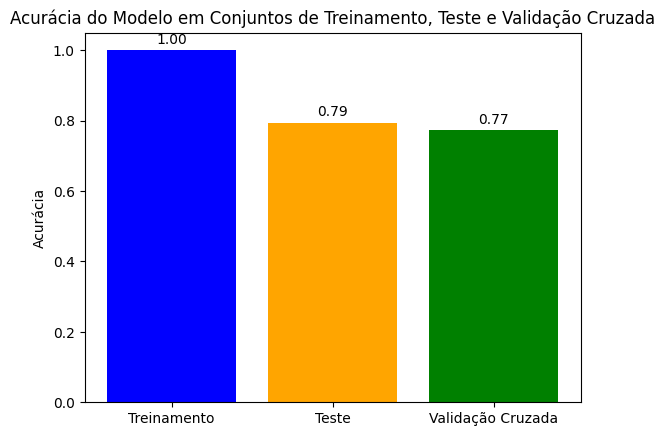

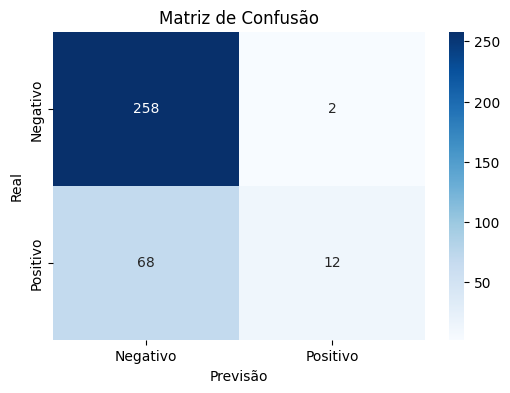

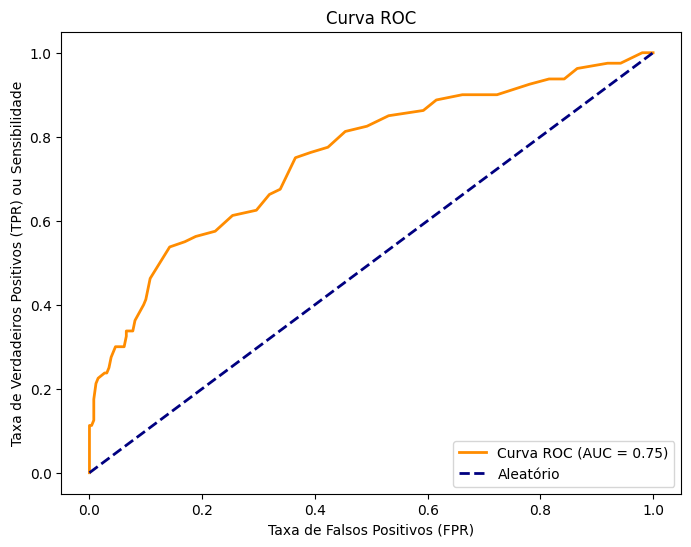

              precision    recall  f1-score   support

           0       0.79      0.99      0.88       260
           1       0.86      0.15      0.26        80

    accuracy                           0.79       340
   macro avg       0.82      0.57      0.57       340
weighted avg       0.81      0.79      0.73       340



In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()

model.fit(X_train, y_train)

try:
    # Fazer previsões no conjunto de teste
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    # Calcular a acurácia do modelo em treinamento e teste
    accuracy_train = accuracy_score(y_train, y_train_pred)
    accuracy_test = accuracy_score(y_test, y_test_pred)

    # Adicionar validação cruzada (5 folds)
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

    # Adicionar métrica de acurácia da validação cruzada ao gráfico de barras
    accuracies = [accuracy_train, accuracy_test, np.mean(cv_scores)]

    # Adicionando rótulos e valores nas barras e plotando gráfico
    labels = ['Treinamento', 'Teste', 'Validação Cruzada']
    for i in range(len(labels)):
        plt.text(i, accuracies[i] + 0.01, f'{accuracies[i]:.2f}', ha='center', va='bottom')

    plt.bar(labels, accuracies, color=['blue', 'orange', 'green'])
    plt.ylabel('Acurácia')
    plt.title('Acurácia do Modelo em Conjuntos de Treinamento, Teste e Validação Cruzada')
    plt.show()

    # Calcular e plotar a matriz de confusão
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negativo', 'Positivo'], yticklabels=['Negativo', 'Positivo'])
    plt.xlabel('Previsão')
    plt.ylabel('Real')
    plt.title('Matriz de Confusão')
    plt.show()

    # Criando e plotando a curva ROC
    probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aleatório')
    plt.xlabel('Taxa de Falsos Positivos (FPR)')
    plt.ylabel('Taxa de Verdadeiros Positivos (TPR) ou Sensibilidade')
    plt.title('Curva ROC')
    plt.legend(loc='lower right')
    plt.show()

    # Calcular e imprimir as métricas
    print(classification_report(y_test, y_test_pred, digits=2, zero_division=1))
    
except Exception as e:
    print(f"Erro: {str(e)}")


In [6]:
probs_test = pd.DataFrame(model.predict_proba(X_test)[:, 1])

In [7]:
probs_test.shape

(340, 1)

In [8]:
y_test.shape

(340,)

In [9]:
probs_test.index

RangeIndex(start=0, stop=340, step=1)

In [10]:
y_test.reset_index(drop=True)

0      1
1      0
2      0
3      0
4      0
      ..
335    0
336    1
337    0
338    0
339    0
Name: ZSN, Length: 340, dtype: int64

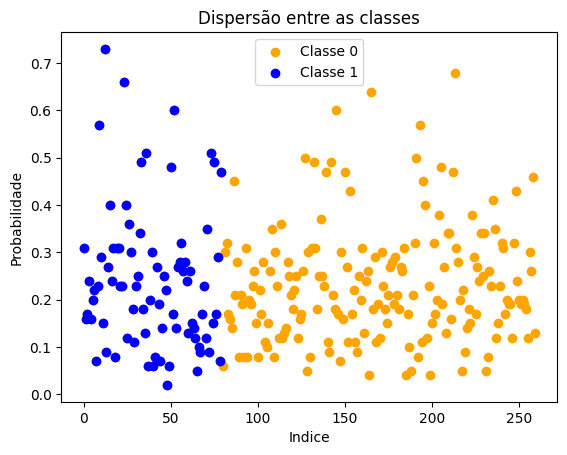

In [11]:
for label in [0, 1]:
    color = 'orange' if label == 0 else "blue"
    class_label = 'Classe 0' if label == 0 else 'Classe 1'
    df_label = y_test[y_test.isin([label])]
    df_probs = probs_test.iloc[df_label.reset_index(drop=True).index]
    
    plt.scatter(x=range(len(df_label)), y=df_probs, c=color, label=class_label)
plt.title('Dispersão entre as classes')
plt.xlabel('Índice')
plt.ylabel('Probabilidade')
plt.legend()
plt.show()